In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
#dependencies
#to access some files
import os
#to load kaggle json file
import json
#to extract the dataset from the Zip file
from zipfile import ZipFile
#for image processing
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [3]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open('/content/kaggle.json'))

In [6]:
#setup kaggle API key as env variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:21<00:00, 162MB/s]
100% 2.04G/2.04G [00:21<00:00, 99.6MB/s]


In [8]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
#Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as z:
   z.extractall()

In [10]:
print(os.listdir('plantvillage dataset/'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])


['grayscale', 'segmented', 'color']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Potato___healthy', 'Tomato___healthy']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Potato___healthy', 'Tomato___healthy']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Potato___healthy', 'Tomato___healthy']


Number of Classes = 38

In [11]:
print(len(os.listdir("plantvillage dataset/color/Apple___Apple_scab")))
print(os.listdir("plantvillage dataset/color/Apple___Apple_scab")[:5])


630
['dfa24368-8ba9-4c02-9c3e-9e9a62a8d479___FREC_Scab 3215.JPG', '675f0b56-9d0b-45b3-8c8e-820efae75274___FREC_Scab 3006.JPG', '83b1935d-f1fc-4b9f-876e-c0dbbb2fcb03___FREC_Scab 3486.JPG', '98d39524-dfe5-42c0-999d-110aa1c49b85___FREC_Scab 3259.JPG', '99f409b1-0e19-43e6-bbc5-95c5368f86be___FREC_Scab 3051.JPG']


**Data Preprocessing**

In [12]:
#Dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


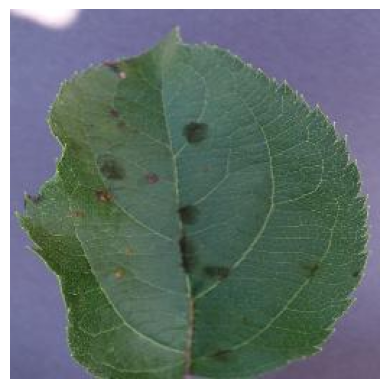

In [13]:
image_path= "/content/plantvillage dataset/color/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG"
img= mpimg.imread(image_path)
print(img.shape)

#Display the image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [14]:
#You can print this image as an array values
image_path= "/content/plantvillage dataset/color/Apple___Apple_scab/08c42d78-aa7b-4106-b0c1-b260f898dcba___FREC_Scab 3151.JPG"
img= mpimg.imread(image_path)
print(img)
#the printed array is the intensity values and this values are ranges from 0-255
#we will rescale this to be in between 0-255

[[[206 191 214]
  [212 197 220]
  [221 206 227]
  ...
  [118 113 153]
  [118 113 153]
  [118 113 153]]

 [[193 177 203]
  [198 184 207]
  [208 193 216]
  ...
  [120 115 155]
  [120 115 155]
  [119 114 154]]

 [[176 162 188]
  [181 169 193]
  [192 178 203]
  ...
  [122 117 157]
  [121 116 156]
  [121 116 156]]

 ...

 [[ 97  97 135]
  [ 98  98 136]
  [ 99  99 137]
  ...
  [108  94 120]
  [108  94 120]
  [109  95 121]]

 [[ 98  98 136]
  [ 99  99 137]
  [ 99  99 137]
  ...
  [107  93 119]
  [109  95 121]
  [109  95 121]]

 [[ 99  99 137]
  [ 99  99 137]
  [ 99  99 137]
  ...
  [107  93 119]
  [109  95 121]
  [110  96 122]]]


In [15]:
#Image parameters
img_size= 224
batch_size=32

Train Test Split

In [16]:
#image data generators
#rescaling/normalizing the value
datagen= ImageDataGenerator(rescale=1./255, validation_split=0.2)#use 20% of data for validation

In [17]:
#train generator
train_generator= datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    #to split the 80% for that var
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [18]:
#validation generator
validation_generator= datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    #to split the 20% for that var
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [19]:
#Model definition
model= models.Sequential()
#Conv2D() feature extractor
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_size, img_size, 3)))
#MaxPooling2D() spatial info reduction
model.add(layers.MaxPooling2D((2,2)))

#64 increasing the filter size to go to more deeper layers
#so the model can find more complex features
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#till this point the data flowing may be in 2D or 3D array
#and we are gonna apply dense layer which is fully connected layers
#and dense layers expect the data to be 1D and that by flatten layer
model.add(layers.Flatten())
#256= 64 *2*2 (2,2) the dimention of maxpooling
model.add(layers.Dense(256, activation='relu'))
#output layer
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
print("Training steps: ", train_generator.samples // batch_size)
print("Validation steps: ", validation_generator.samples // batch_size)

Training steps:  1358
Validation steps:  339


**Model Training**

In [ ]:
#training thr model
history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 91s 67ms/step - accuracy: 0.9959 - loss: 0.0160 - val_accuracy: 0.8712 - val_loss: 0.9759
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 69ms/step - accuracy: 0.9949 - loss: 0.0235 - val_accuracy: 0.8566 - val_loss: 1.1592
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 0.9956 - loss: 0.0174 - val_accuracy: 0.8632 - val_loss: 1.1064
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 0.9943 - loss: 0.0207 - val_accuracy: 0.8415 - val_loss: 1.4355
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - accuracy: 0.9951 - loss: 0.0188 - val_accuracy: 0.8727 - val_loss: 1.1223
Epoch 6/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - accuracy: 0.9972 - loss: 0.0104 - val_accuracy: 0.8587 - val_loss: 1.2320
Epoch 7/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 66ms/step - accuracy: 0.9961 - loss: 0.0136 - val_accuracy: 0.8716 - val_loss: 1.2102
Epoch 8/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - acc

**Model Evaluation**

In [61]:
#Model Evaluation
print("Evaluating model: ")
val_loss, val_accuracy= model.evaluate(validation_generator)
print(f"Validation accuracy:  {val_accuracy * 100:.2f}%")
print("Validation loss: ", val_loss)

Evaluating model: 
340/340 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8706 - loss: 0.9189
Validation accuracy:  86.95%
Validation loss:  0.915285050868988


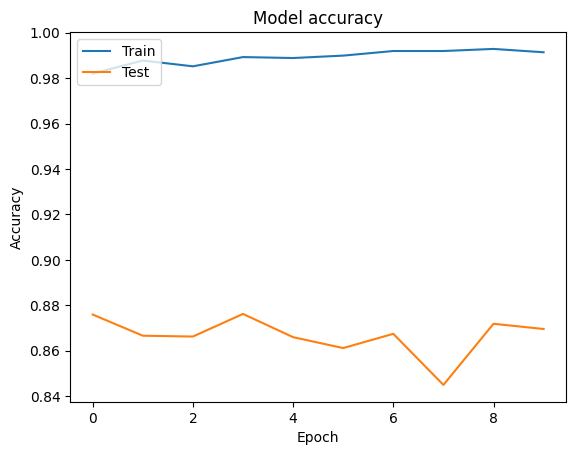

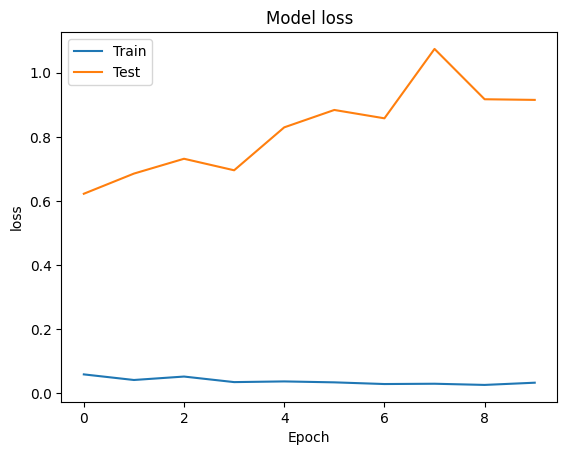

In [62]:
#plot training & validation accuraccy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Prediction System**

In [63]:
#Function to load and preprocessing the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  #Load the image
  img= Image.open(image_path)
  #Resize the image
  img= img.resize(target_size)
  #Convert it into numpy array
  img_array= np.array(img)
  #Add batch dimesion
  img_array= np.expand_dims(img_array,axis=0)
  #Scale the image values to [0,1]
  img_array = img_array.astype('float32')/ 255.
  return img_array

#Function to Predict the Class of an Image
def predict_image_class(model,mage_path, class_indices):
  preprocessed_img= load_and_preprocess_image(image_path)
  #prediction will be the probability that this value belonging to all thos 38 class
  prediction= model.predict(preprocessed_img)
  #return the index of the highest probability value
  predicted_class_index= np.argmax(prediction,axis=1)[0]
  #assume that 0.6 is the heighest probability which is in index five
  #and we want to know index 5 for which class name
  #so class_indices[5]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name


In [64]:
#Create a mapping from class indices to class names
#k will be from 0 to 37
#v will be the class name
class_indices = {v: k for k, v in train_generator.class_indices.items()}
print(class_indices)



{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [65]:
#saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [66]:
#Example usage
#image_path="/content/images.jpeg"
image_path="/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/0a273dc4-db45-4936-aee3-59919e1df44f___JR_HL 9805.JPG"

predicted_class_name= predict_image_class(model, image_path, class_indices)
print(f"The predicted class for the image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The predicted class for the image is: Cherry_(including_sour)___healthy


**Save the model to Google drive**

In [67]:
model.save("/content/drive/MyDrive/PlantDeiseasCNN/plant.h5")

In [68]:
!pip install -q streamlit


In [69]:
import streamlit as st

In [70]:
%%writefile app.py


import os
import json
from PIL import Image

import numpy as np
import tensorflow as tf
import streamlit as st



working_dir = '/content'
model_path = f"{working_dir}/drive/MyDrive/PlantDeiseasCNN/plant.h5"
# Load the pre-trained model
model = tf.keras.models.load_model(model_path)

# loading the class names
class_indices = json.load(open(f"{working_dir}/class_indices.json"))


# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array


# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[str(predicted_class_index)]
    return predicted_class_name


# Streamlit App
st.title('Plant Disease Classifier')

uploaded_image = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    image = Image.open(uploaded_image)
    col1, col2 = st.columns(2)

    with col1:
        resized_img = image.resize((150, 150))
        st.image(resized_img)

    with col2:
        if st.button('Classify'):
            # Preprocess the uploaded image and predict the class
            prediction = predict_image_class(model, uploaded_image, class_indices)
            st.success(f'Prediction: {str(prediction)}')

Overwriting app.py


In [71]:
!npm install localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇
up to date, audited 23 packages in 1s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

In [72]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501


⠙your url is: https://real-bats-sip.loca.lt
^C
